In [24]:
import numpy as np
import torch
from cebmf_torch.torch_ebnm_point_exp import ebnm_point_exp_solver
import matplotlib.pyplot  as plt
x = torch.tensor([1.0, 1.0, -0.5])
s = torch.tensor([1.0, 1.0, 1.0])
res = ebnm_point_exp_solver(x, s  )
    # Expected numbers from original tests (allow small tolerance)
 

In [25]:
res.pi

0.9999969601631165

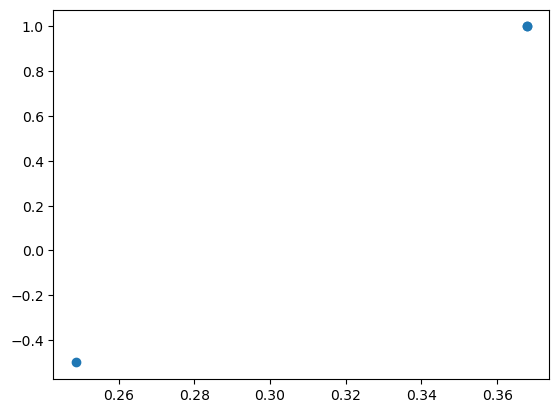

In [26]:
plt.scatter( res.post_mean, x)

In [27]:
res.log_lik # -3.636553632132083

-3.636544942855835

In [28]:
float(res.pi)#0.9999563044116645

0.9999969601631165

In [29]:
float(res.scale)#3.047337093696241

3.047322988510132

In [30]:
float(res.mode)# 0.0

0.0

In [31]:
import torch
import math

# If you saved the previous implementation in torch_only_point_exponential.py:
# from torch_only_point_exponential import ebnm_point_exp_solver

torch.manual_seed(0)
dtype = torch.float64
device = "cpu"

# Generate data (same structure as your NumPy snippet)
true_val1 = torch.randn(100, dtype=dtype, device=device)          # ~ N(0,1)
true_val0 = torch.zeros(200, dtype=dtype, device=device)

observations_mu_1 = true_val1 + torch.randn(100, dtype=dtype, device=device)  # add N(0,1) noise
observations_mu_0 = true_val0 + torch.randn(200, dtype=dtype, device=device)  # add N(0,1) noise

betahat = torch.cat([observations_mu_1, observations_mu_0], dim=0)            # shape (300,)
sebetahat = torch.ones_like(betahat)                                          # all s = 1

# Fit point-exponential EBNM
res = ebnm_point_exp_solver(
    x=betahat,
    s=sebetahat# [alpha, beta, mu] (alpha=0 => w≈0.5, beta=0 => a=1)
)

# Quick summary
 

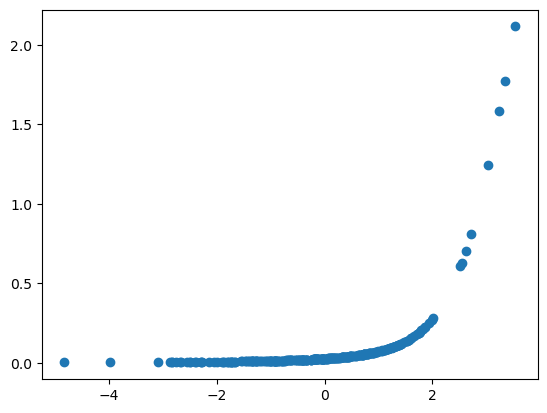

In [32]:
plt.scatter(betahat, res.post_mean   )